In [51]:
# Task 4:SPAM SMS DETECTION

In [52]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
#Load a data
#encoding='latin-1' specifies the character encoding used to read the CSV file.
Spam_data=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [54]:
Spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [55]:
Spam_data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [56]:
Spam_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [57]:
Spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [58]:
Spam_data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [59]:
Spam_data.shape

(5572, 5)

In [60]:
column_to_check = 'v1'
is_unique = Spam_data[column_to_check].is_unique
print(f"Are values in '{column_to_check}' unique? {is_unique}")

Are values in 'v1' unique? False


In [61]:
column_to_check = 'v2'
is_unique = Spam_data[column_to_check].is_unique
print(f"Are values in '{column_to_check}' unique? {is_unique}")

Are values in 'v2' unique? False


In [62]:
Spam_data.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

In [63]:
column_to_drop = 'Unnamed: 2'
data = Spam_data.drop(column_to_drop, axis=1)
rows_to_drop = [0, 1, 2]
data = Spam_data.drop(rows_to_drop)

In [64]:
Spam_data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [65]:
Spam_data.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [66]:
Spam_data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [67]:
# Check for duplicate rows
duplicates = data[Spam_data.duplicated()]
# Display duplicate rows
print(duplicates)

        v1                                                 v2 Unnamed: 2  \
102    ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
153    ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
206    ham  As I entered my cabin my PA said, '' Happy B'd...        NaN   
222    ham                             Sorry, I'll call later        NaN   
325    ham                   No calls..messages..missed calls        NaN   
...    ...                                                ...        ...   
5524  spam  You are awarded a SiPix Digital Camera! call 0...        NaN   
5535   ham  I know you are thinkin malaria. But relax, chi...        NaN   
5539   ham                         Just sleeping..and surfing        NaN   
5553   ham                        Hahaha..use your brain dear        NaN   
5558   ham                             Sorry, I'll call later        NaN   

     Unnamed: 3 Unnamed: 4  
102         NaN        NaN  
153         NaN        NaN  


<ipython-input-67-c3611da082b1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates = data[Spam_data.duplicated()]


In [68]:
# Remove duplicate rows
data_no_duplicates = Spam_data.drop_duplicates()
print(Spam_data.duplicated().sum())

403


In [69]:
# Drop the columns that are not useful
Spam_data= Spam_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
# Rename the columns
Spam_data= Spam_data.rename(columns={'v1': 'Tag', 'v2': 'Information'})

In [70]:
Spam_data

,Tag,Information
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [71]:
# Creating a new column called 'length' in the 'Spam_data' data
# Use the 'str.len()' method to find the length of each string in the 'Information' column
Spam_data['length'] = Spam_data['Information'].str.len()


In [72]:
Spam_data

,Tag,Information,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<ipython-input-73-41155bd12aee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tag', data=Spam_data, palette='husl')


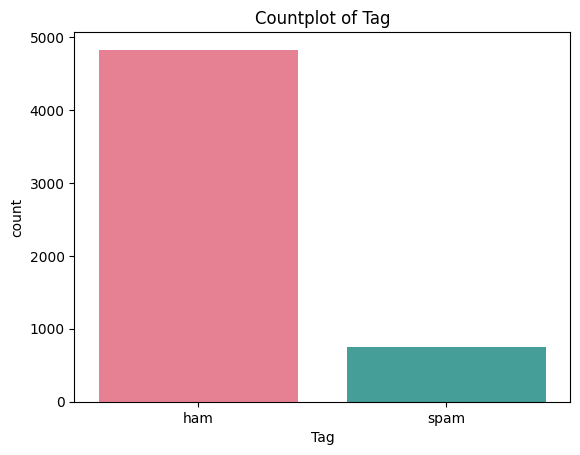

In [73]:
# Exploratory Data Analysis
# Countplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.countplot(x='Tag', data=Spam_data, palette='husl')
plt.title('Countplot of Tag')
plt.show()

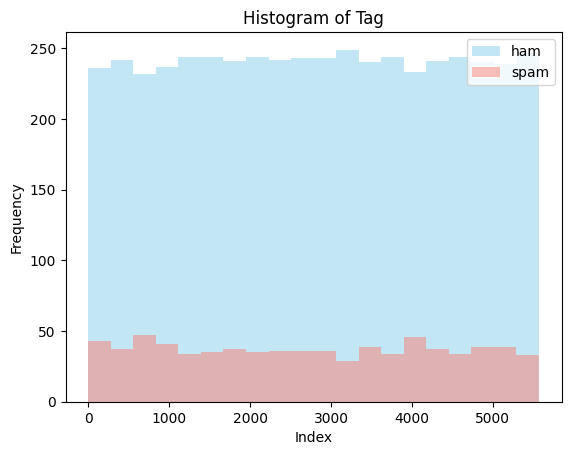

In [74]:
# Histogram for 'ham' and 'spam' tags
plt.hist(Spam_data[Spam_data['Tag'] == 'ham'].index, bins=20, alpha=0.5, label='ham', color='skyblue')
plt.hist(Spam_data[Spam_data['Tag'] == 'spam'].index, bins=20, alpha=0.5, label='spam', color='salmon')
plt.title('Histogram of Tag')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.legend()
plt.show()


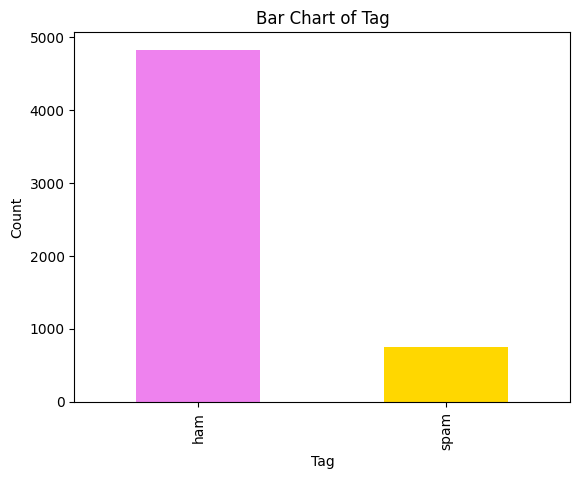

In [75]:
tag_colors = {'ham': 'violet', 'spam': 'gold'}
tag_counts = Spam_data['Tag'].value_counts()
tag_counts.plot(kind='bar', color=[tag_colors[tag] for tag in tag_counts.index])
plt.title('Bar Chart of Tag')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.show()


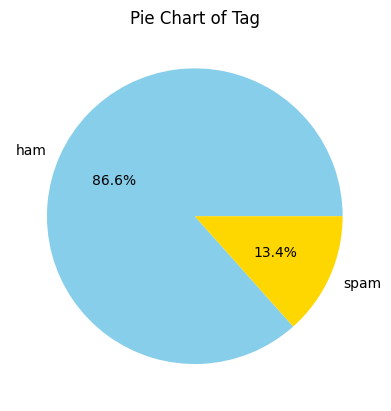

In [76]:
tag_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'gold'])
plt.title('Pie Chart of Tag')
plt.ylabel('')
plt.show()

In [77]:
Spam_data['Tag'].value_counts()

ham     4825
spam     747
Name: Tag, dtype: int64

In [78]:
# Naive Bayes Method
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Spam_data['Information'], Spam_data['Tag'], test_size=0.2, random_state=42)
# Convert the text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
# Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)
# Predictions on the testing set
predicted_label = clf.predict(X_test_counts)
# Calculating the accuracy of the predictions
accuracy = accuracy_score(y_test, predicted_label)
print('Accuracy:', accuracy)
# Calculating the classification report
report = classification_report(y_test, predicted_label)
print('Classification Report:\n', report)



Accuracy: 0.9838565022421525
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [79]:
X_train.head()

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
Name: Information, dtype: object

In [80]:
X_test.head()

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
Name: Information, dtype: object

In [81]:
y_train.head()

1978     ham
3989    spam
3935     ham
4078     ham
4086    spam
Name: Tag, dtype: object

In [82]:
y_test.head()

3245     ham
944      ham
1044    spam
2484     ham
812     spam
Name: Tag, dtype: object

In [83]:
# Logistic Regression Method
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(Spam_data['Information'], Spam_data['Tag'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
# Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train_counts, y_train)
predicted_label = clf.predict(X_test_counts)
accuracy = accuracy_score(y_test, predicted_label)
print('Accuracy:', accuracy)
report = classification_report(y_test, predicted_label)
print('Classification Report:\n', report)

Accuracy: 0.97847533632287
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [92]:
from sklearn.metrics import confusion_matrix
# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_label)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[965   0]
 [ 23 127]]


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(Spam_data)

In [87]:
print(type(tf_idf_vector), tf_idf_vector.shape)

<class 'scipy.sparse._csr.csr_matrix'> (3, 3)


In [88]:
tf_idf_array = tf_idf_vector.toarray()
print(tf_idf_array)


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
words_set = tr_idf_model.get_feature_names_out()
print(words_set)

['information' 'length' 'tag']


In [91]:
# Support Vector Machine Method
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(Spam_data['Information'], Spam_data['Tag'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
# Support Vector Machine classifier
clf = svm.SVC()
clf.fit(X_train_counts, y_train)
predicted_label = clf.predict(X_test_counts)
accuracy = accuracy_score(y_test, predicted_label)
print('Accuracy:', accuracy)
report = classification_report(y_test, predicted_label)
print('Classification Report:\n', report)


Accuracy: 0.979372197309417
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

